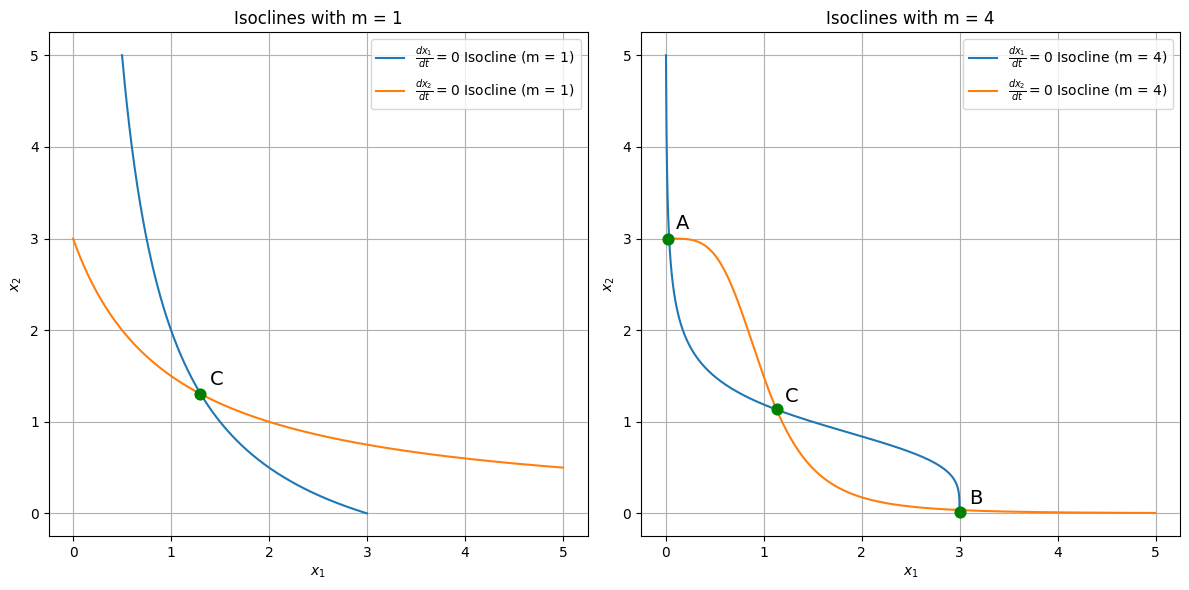

In [67]:
import numpy as np
import matplotlib.pyplot as plt

#####################################
L1 = 3
L2 = 3

m_1 = 1
m_2 = 4
##############################

x1_range = np.linspace(0, 5, 400)
x2_range = np.linspace(0, 5, 400)

x1_isocline_1 = L1 / (1 + x2_range ** m_1)
x2_isocline_1 = L2 / (1 + x1_range ** m_1)

x1_isocline_2 = L1 / (1 + x2_range ** m_2)
x2_isocline_2 = L2 / (1 + x1_range ** m_2)

plt.figure(figsize=(12, 6))

# Plotting with m = 1
plt.subplot(1, 2, 1)
plt.plot(x1_isocline_1, x2_range, label=r'$\frac{dx_1}{dt} = 0$ Isocline (m = 1)')
plt.plot(x1_range, x2_isocline_1, label=r'$\frac{dx_2}{dt} = 0$ Isocline (m = 1)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Isoclines with m = 1')
plt.legend()
plt.grid(True)

### point C
plt.scatter(1.3, 1.3, color='green', s=60, zorder=5)
plt.text(1.4, 1.4, 'C', fontsize=14)


# Second plot with m = 3
plt.subplot(1, 2, 2)
plt.plot(x1_isocline_2, x2_range, label=r'$\frac{dx_1}{dt} = 0$ Isocline (m = 4)')
plt.plot(x1_range, x2_isocline_2, label=r'$\frac{dx_2}{dt} = 0$ Isocline (m = 4)')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Isoclines with m = 4')
plt.legend()
plt.grid()

### point A
plt.scatter(0.02, 3, color='green', s=60, zorder=5)
plt.text(0.1, 3.1, 'A', fontsize=14)

### point B
plt.scatter(3, 0.02,  color='green', s=60, zorder=5)
plt.text(3.1, 0.1,  'B', fontsize=14)

### point C
plt.scatter(1.135, 1.135, color='green', s=60, zorder=5)
plt.text(1.22, 1.22, 'C', fontsize=14)

plt.tight_layout()
plt.savefig('images/m1-m4_isoclines.png')
plt.show()


<Figure size 800x600 with 0 Axes>

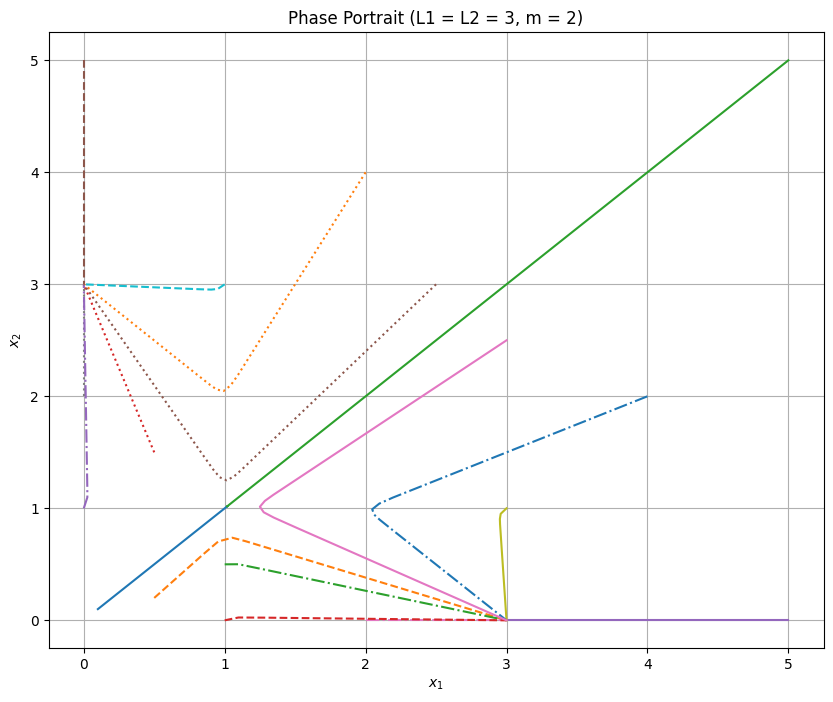

In [51]:
from scipy.integrate import odeint

m_3 = 4

def func(X, t):
    x1, x2 = X

    dx1_dt = (L1 / (1 + x2 ** m_3)) - x1
    dx2_dt = (L2 / (1 + x1 ** m_3)) - x2

    return [dx1_dt, dx2_dt]

t = np.linspace(0, 20, 400)

plt.figure(figsize=(8, 6))

initial_conditions = [
    [0.1, 0.1], [0.5, 0.2], [1, 0.5],
    [0.5, 1.5], [5, 0], [0, 5], [2, 0],
    [0, 2], [3, 1], [1, 3], [4, 2], [2, 4],
    [5, 5], [1, 0], [0, 1], [2.5, 3], [3, 2.5]
]

line_styles = ['-', '--', '-.', ':']

# Plotting the phase portrait
plt.figure(figsize=(10, 8))

for i, X0 in enumerate(initial_conditions):
    X = odeint(func, X0, t)
    plt.plot(X[:, 0], X[:, 1], linestyle=line_styles[i % len(line_styles)])

plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.title('Phase Portrait (L1 = L2 = 3, m = 2)')
plt.grid()
plt.savefig('figure_2.png')
plt.show()


